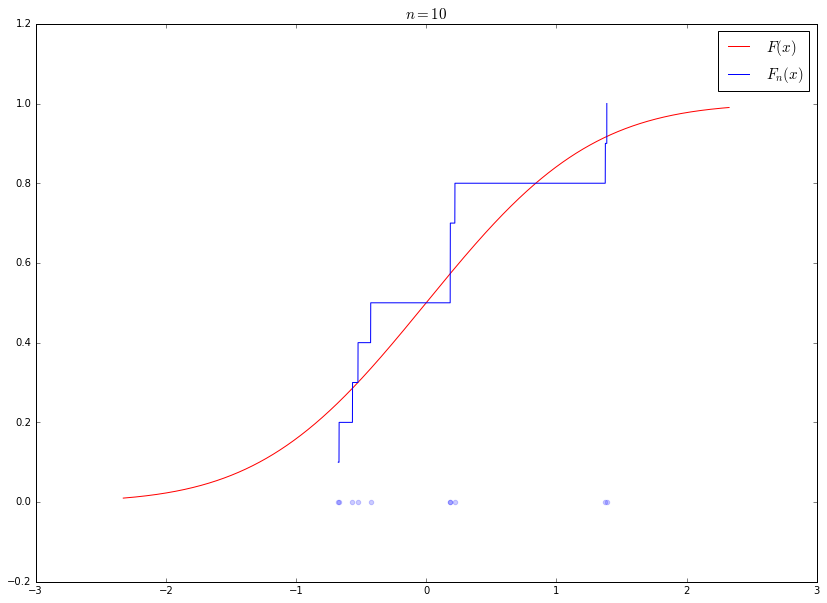

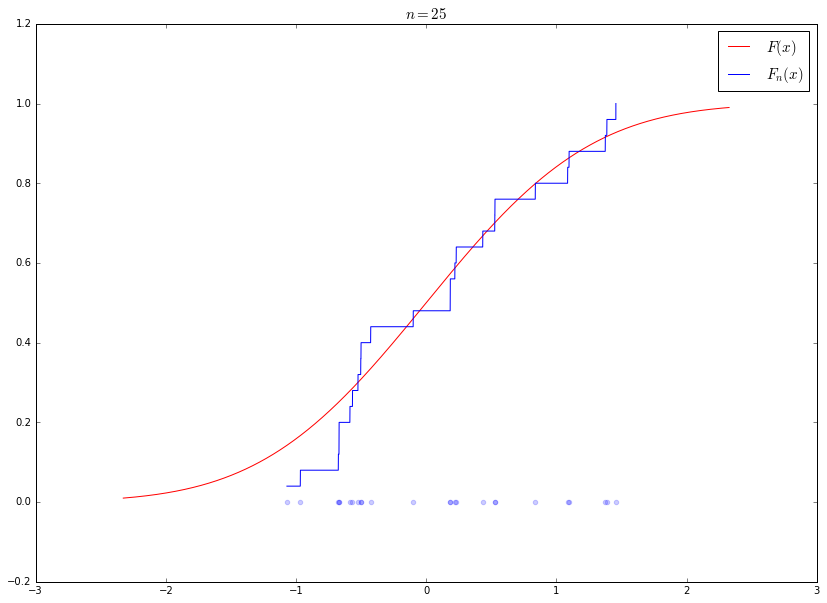

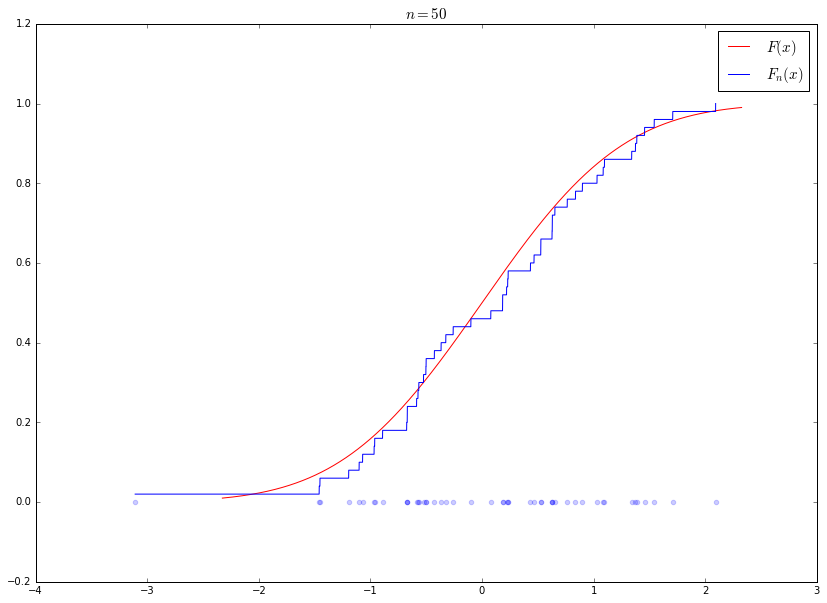

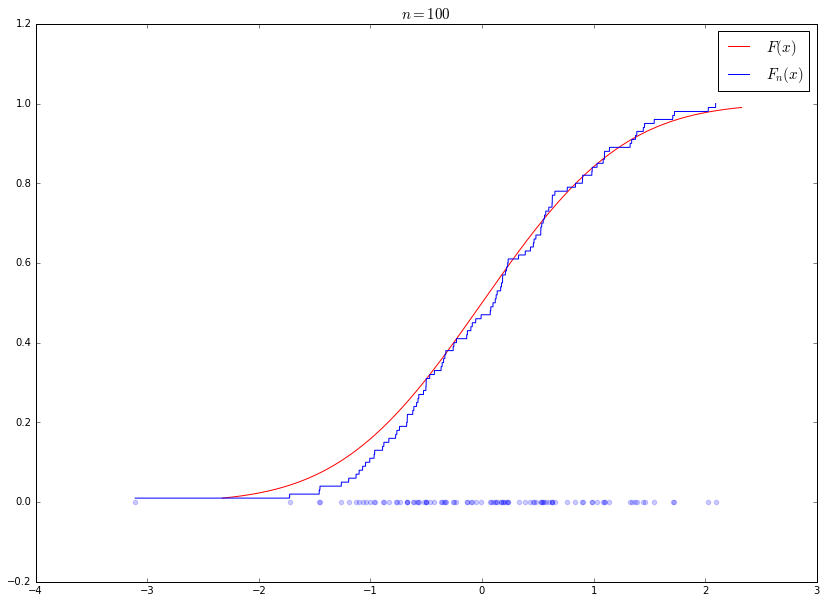

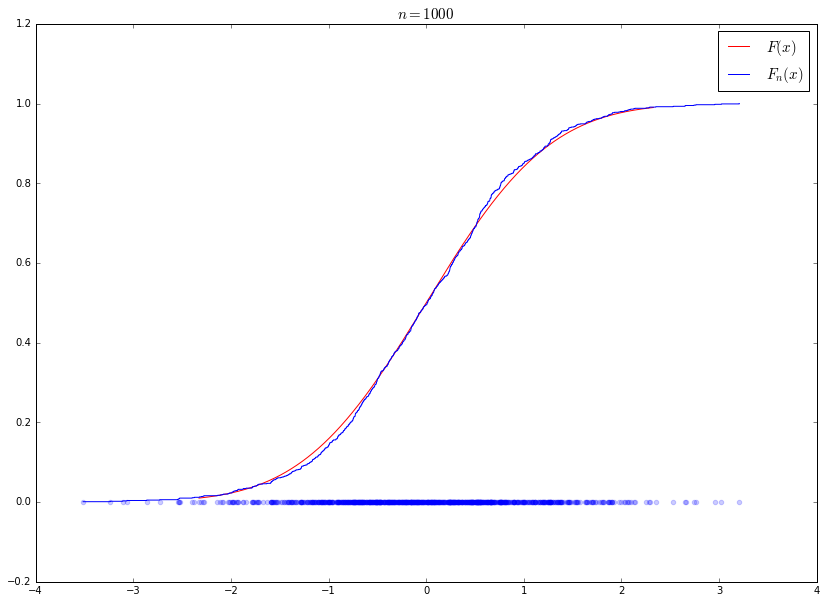

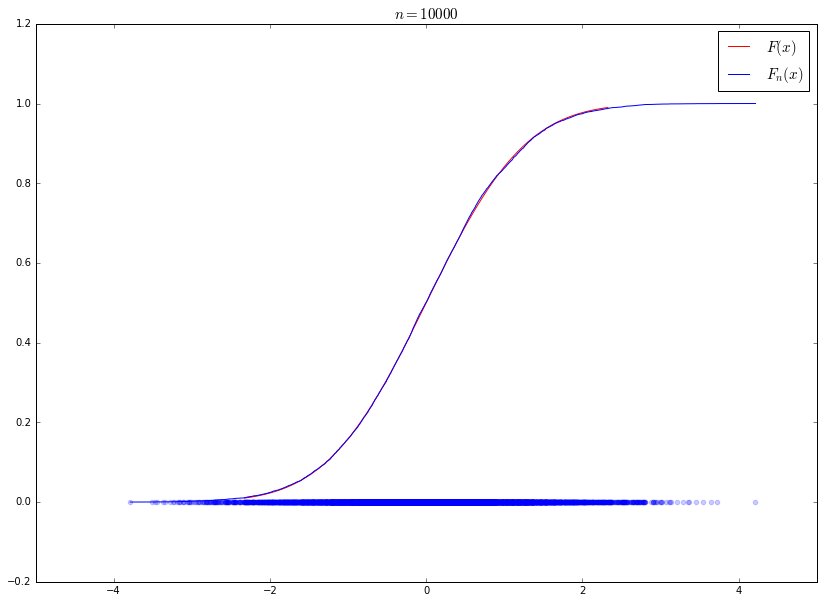

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
from scipy.stats import norm

N = 10000

# generate samples from normal distribution
x = norm.rvs(0, 1, N)

for n in [10, 25, 50, 100, 1000, N]:
    # init graph
    plt.figure(figsize=(14, 10))
    plt.title("$n = " + str(n) + "$", fontsize=15)
    
    # N(0,1)
    absc = np.linspace(norm.ppf(0.01), norm.ppf(0.99), N)
    plt.plot(absc, norm.cdf(absc), 'r', label='$F(x)$')
    
    # empiric pdf
    cumfreq = sps.cumfreq(x[:n], N)
    absc = cumfreq.lowerlimit + np.linspace(0, cumfreq.binsize * cumfreq.cumcount.size,
                                            cumfreq.cumcount.size)
    plt.plot(absc, cumfreq.cumcount / n, 'b', label='$F_n(x)$')
    plt.scatter(x[:n], np.zeros(n), color='b', alpha=0.2)
    
    plt.legend(fontsize=15)
    plt.show()
    
# D_n
d_n = np.zeros(N)
# init graph
plt.figure(figsize = (14, 10))
plt.title("$\\D_n = \\sup_{x \\in \\mathbb{R}}|F_n(x) - F(x)|$", fontsize=15)

for n in range(1, N):
    cumfreq = sps.cumfreq(x[:n], N)
    absc = cumfreq.lowerlimit + np.linspace(0, cumfreq.binsize * cumfreq.cumcount.size,
                                            cumfreq.cumcount.size)
    sup = 0
    for i in range(absc.size):
        sup = max(sup, abs(norm.cdf(absc[i]) - cumfreq.cumcount[i] / n))
    d_n[n] = sup
    
plt.plot(d_n, 'r', label='$\\D_n = \\sup_{x \\in \\mathbb{R}}|F_n(x) - F(x)|$')
plt.show()